# Este arquivo jupyter tem como objetivo fazer a conexão entre arquivo.XLSM e SQL, utilizando a tabela de dados e o servidor local Bioforests

### 1. Primeiramente, instalando as bibliotecas necessárias:

In [ ]:
# Bibliotecas

# Dados
import pandas as pd
import numpy as np
import seaborn as sns

# SQL
import psycopg
from psycopg import sql


from pathlib import Path #permite utilizar o caminho pelo windows (com /)

### 2. Colocando os dados da tabela (ainda sem dinamismo) em um dataframe:


In [ ]:
caminho_arquivo = Path("C:/GHG/TabelaDadosGHG.xlsx") # caminho para o arquivo no Excel

# Carregar o arquivo Excel da tabela de dados
df_dados = pd.read_excel(caminho_arquivo)

print(df_dados)

                      especie nome_cientifico  longevidade  ton_hectare_ano  \
0                    Abacate     P. americana           20        15.327200   
1             Abacate-espada    P. gratissima           20        14.232400   
2               Abacate-roxo      P. nubiania           20        14.232400   
3                       Abiú       P. caimito           25         5.869609   
4                   Abiurana         P. torta           30        12.942468   
..                        ...             ...          ...              ...   
233            Uvaia-guarimi    E. stigmatosa           15         5.583287   
234  Uvainha-doce-do-cerrado     E. pubescens           15         5.583287   
235                      Uxí          E. uchi           40         5.654867   
236                   Varova    P. myrcifolia           25         5.296964   
237                     Xixá       S. curiosa           30         8.236116   

     ton_madeira_hectare  ton_C_hectare  ton_CO2_he

#### 2.1 Fazendo uma verificação dos dados:

In [3]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   especie              238 non-null    object 
 1   nome_cientifico      238 non-null    object 
 2   longevidade          238 non-null    int64  
 3   ton_hectare_ano      238 non-null    float64
 4   ton_madeira_hectare  238 non-null    float64
 5   ton_C_hectare        238 non-null    float64
 6   ton_CO2_hectare      238 non-null    float64
 7   parte_aerea          238 non-null    float64
 8   serrapilheira        238 non-null    float64
 9   raiz                 238 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 18.7+ KB


In [4]:
df_dados.head().round(3)

,especie,nome_cientifico,longevidade,ton_hectare_ano,ton_madeira_hectare,ton_C_hectare,ton_CO2_hectare,parte_aerea,serrapilheira,raiz
0,Abacate,P. americana,20,15.327,306.544,134.879,494.558,346.190,49.456,98.912
1,Abacate-espada,P. gratissima,20,14.232,284.648,125.245,459.232,321.462,45.923,91.846
2,Abacate-roxo,P. nubiania,20,14.232,284.648,125.245,459.232,321.462,45.923,91.846
3,Abiú,P. caimito,25,5.870,146.740,64.566,236.741,165.719,23.674,47.348
4,Abiurana,P. torta,30,12.942,388.274,170.841,626.415,438.491,62.642,125.283


In [5]:
df_dados.tail().round(3)

,especie,nome_cientifico,longevidade,ton_hectare_ano,ton_madeira_hectare,ton_C_hectare,ton_CO2_hectare,parte_aerea,serrapilheira,raiz
233,Uvaia-guarimi,E. stigmatosa,15,5.583,83.749,36.850,135.116,94.581,13.512,27.023
234,Uvainha-doce-do-cerrado,E. pubescens,15,5.583,83.749,36.850,135.116,94.581,13.512,27.023
235,Uxí,E. uchi,40,5.655,226.195,99.526,364.927,255.449,36.493,72.985
236,Varova,P. myrcifolia,25,5.297,132.424,58.267,213.644,149.551,21.364,42.729
237,Xixá,S. curiosa,30,8.236,247.083,108.717,398.628,279.040,39.863,79.726


In [6]:
df_dados.describe().round(2)

,longevidade,ton_hectare_ano,ton_madeira_hectare,ton_C_hectare,ton_CO2_hectare,parte_aerea,serrapilheira,raiz
count,238.00,238.00,238.00,238.00,238.00,238.00,238.00,238.00
mean,18.74,7.32,143.03,62.93,230.76,161.53,23.08,46.15
std,6.67,3.73,104.07,45.79,167.90,117.53,16.79,33.58
min,5.00,1.07,6.43,2.83,10.38,7.26,1.04,2.08
25%,15.00,4.94,80.53,35.43,129.92,90.94,12.99,25.98
50%,15.00,5.58,91.27,40.16,147.24,103.07,14.72,29.45
75%,20.00,10.04,190.20,83.69,306.85,214.80,30.69,61.37
max,40.00,18.34,494.17,217.43,797.26,558.08,79.73,159.45


<Axes: >

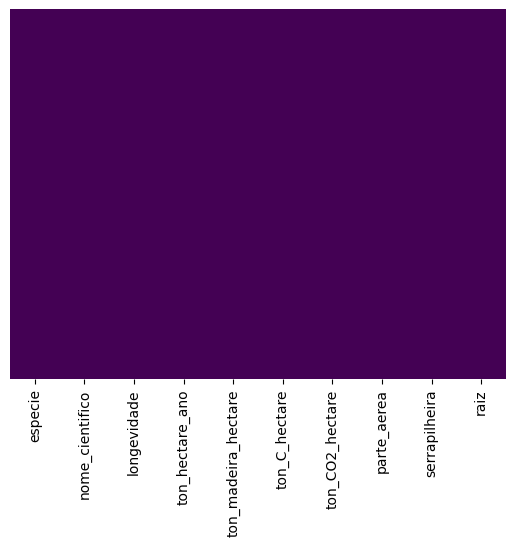

In [7]:
# Verificando NaNs por precaução

sns.heatmap(df_dados.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='viridis')

### 3. Colocando os dados da tabela no servidor Bioforests (PostgreSQL):

#### 3.1 Inserindo os dados na Tabela do Postgres:

In [ ]:
# Conectar ao PostgreSQL com as especificações do banco de dados local
conn = psycopg.connect(
    dbname="tabela_de_dados",
    user="postgres",
    password="password",
    host="localhost",
    port="5432"
)

# cria um cursor para permitir a conexão com o banco
cur = conn.cursor()

# verificação de mudanças na tabela
inseridas = 0
atualizadas = 0
duplicatas = 0

try:
    for index, row in df_dados.iterrows():
        # Utilizando o "Nome Cientifico" como chave primária de acesso,
        # O codigo verifica a existencia de linhas coincidentes dentro
            # do banco de dados.
        cur.execute(
            sql.SQL("""
                SELECT especie, nome_cientifico, longevidade, ton_hectare_ano, ton_madeira_hectare, ton_C_hectare, ton_CO2_hectare, parte_aerea, serrapilheira, raiz 
                FROM tabela_de_dados 
                WHERE nome_cientifico = %s
            """),
            (row['nome_cientifico'],)
        )
        resultado = cur.fetchone()

        if resultado: 
            # Se a linha de fato já existe e tem todos os valores das colunas exatamente iguais,
                # a variável "duplicatas" é aumentada em 1 e o código passa para a outra especie.
            # Se a especie já estiver inserida na tabela porém tiver algum campo diferente do que tinha
                # anteriormente, o código modifica a linha em questão para a linha atualizada e adiciona
                # 1 na variável "atualizadas".
            # Caso a linha não exista dentro do banco, ela é adicionada e é somado 1 na variável "inseridas". 
            if (
                resultado[0] == row['especie'] and
                resultado[1] == row['nome_cientifico'] and
                resultado[2] == row['longevidade'] and
                resultado[3] == row['ton_hectare_ano'] and
                resultado[4] == row['ton_madeira_hectare'] and
                resultado[5] == row['ton_C_hectare'] and
                resultado[6] == row['ton_CO2_hectare'] and
                resultado[7] == row['parte_aerea'] and
                resultado[8] == row['serrapilheira'] and
                resultado[9] == row['raiz']
            ):
                duplicatas += 1
                continue 
            else:
                cur.execute(
                    sql.SQL("""
                        UPDATE tabela_de_dados 
                        SET 
                            especie = %s,
                            longevidade = %s,
                            ton_hectare_ano = %s,
                            ton_madeira_hectare = %s,
                            ton_C_hectare = %s,
                            ton_CO2_hectare = %s,
                            parte_aerea = %s,
                            serrapilheira = %s,
                            raiz = %s
                        WHERE nome_cientifico = %s
                    """),
                    (
                        row['especie'], row['longevidade'], 
                        row['ton_hectare_ano'], row['ton_madeira_hectare'], 
                        row['ton_C_hectare'], row['ton_CO2_hectare'], 
                        row['parte_aerea'], row['serrapilheira'], row['raiz'],
                        row['nome_cientifico']
                    )
                )
                atualizadas += 1 
        else:
            cur.execute(
                sql.SQL("""
                    INSERT INTO tabela_de_dados 
                    (especie, nome_cientifico, longevidade, ton_hectare_ano, ton_madeira_hectare, ton_C_hectare, ton_CO2_hectare, parte_aerea, serrapilheira, raiz) 
                    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
                """),
                (
                    row['especie'], row['nome_cientifico'], row['longevidade'], 
                    row['ton_hectare_ano'], row['ton_madeira_hectare'], row['ton_C_hectare'], 
                    row['ton_CO2_hectare'], row['parte_aerea'], row['serrapilheira'], row['raiz']
                )
            )
            inseridas += 1
    conn.commit()

    # Mostra o número de linhas alteradas, inseridas ou ignoradas.
    print(f"Linhas Inseridas: {inseridas}")
    print(f"Linhas Atualizadas: {atualizadas}")
    print(f"Linhas Duplicadas Ignoradas: {duplicatas}")

except Exception as e:
    print(f"Erro ao processar os dados: {e}")
    conn.rollback()
finally:
    cur.close()
    conn.close()

Linhas Inseridas: 0
Linhas Atualizadas: 238
Linhas Duplicadas Ignoradas: 0
